In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

# Mobile Games: A/B Testing

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding!

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.

In [3]:
dataset = pd.read_csv('./data/cookie_cats.csv')

dataset.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


The data is from 90,189 players that installed the game while the AB-test was running. The variables are:

- userid - a unique number that identifies each player.
- version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
- sum_gamerounds - the number of game rounds played by the player during the first week after installation
- retention_1 - did the player come back and play 1 day after installing?
- retention_7 - did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

## Summary Statistics

### Unique Users

In [5]:

print('All users are unique?: {}'.format(dataset.userid.nunique() == dataset.shape[0]))

All users are unique?: True


### Game Round Score Sum

In [6]:
dataset.describe([0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 0.99])['sum_gamerounds']

count   90189.0000
mean       51.8725
std       195.0509
min         0.0000
1%          0.0000
5%          1.0000
10%         1.0000
20%         3.0000
50%        16.0000
80%        67.0000
90%       134.0000
95%       221.0000
99%       493.0000
max     49854.0000
Name: sum_gamerounds, dtype: float64

In [7]:
dataset.groupby('version').sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0000,52.4563,256.7164,49854
gate_40,45489,16.0000,51.2988,103.2944,2640


In [8]:
gate30dataset = dataset[dataset['version'] == 'gate_30']
gate40dataset = dataset[dataset['version'] == 'gate_40']

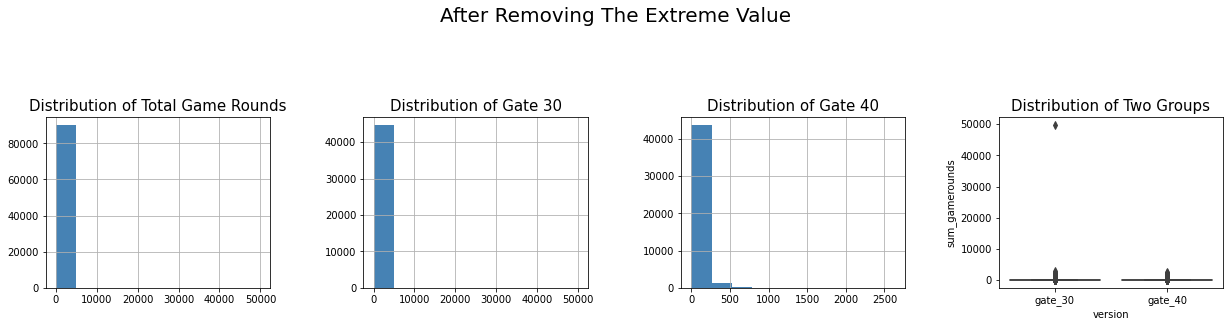

In [9]:
fig, axes = plt.subplots(1, 4, figsize = (18, 5))

dataset.sum_gamerounds.hist(ax=axes[0], color="steelblue")

gate30dataset.hist("sum_gamerounds", ax=axes[1], color="steelblue")
gate40dataset.hist("sum_gamerounds", ax=axes[2], color="steelblue")

sns.boxplot(x=dataset.version, y=dataset.sum_gamerounds, ax=axes[3])

plt.suptitle("After Removing The Extreme Value", fontsize=20)
axes[0].set_title("Distribution of Total Game Rounds", fontsize=15)
axes[1].set_title("Distribution of Gate 30", fontsize=15)
axes[2].set_title("Distribution of Gate 40", fontsize=15)
axes[3].set_title("Distribution of Two Groups", fontsize=15)

plt.tight_layout(pad=4);

Total game score contains an outlier with the score 49854.

In [10]:
dataset = dataset[dataset['sum_gamerounds'] < dataset['sum_gamerounds'].max()]

In [11]:
gate30dataset = dataset[dataset['version'] == 'gate_30'].reset_index().set_index("index")
gate40dataset = dataset[dataset['version'] == 'gate_40'].reset_index().set_index("index")

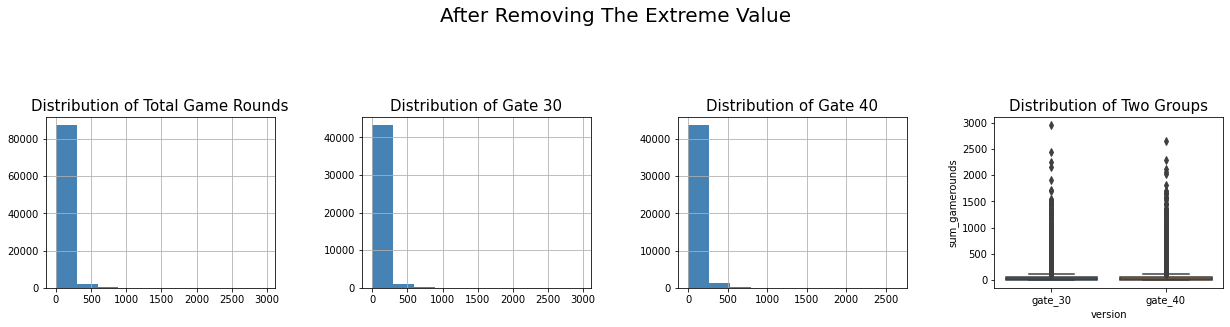

In [12]:
fig, axes = plt.subplots(1, 4, figsize = (18, 5))

dataset.sum_gamerounds.hist(ax=axes[0], color="steelblue")

gate30dataset.hist("sum_gamerounds", ax=axes[1], color="steelblue")
gate40dataset.hist("sum_gamerounds", ax=axes[2], color="steelblue")

sns.boxplot(x=dataset.version, y=dataset.sum_gamerounds, ax=axes[3])

plt.suptitle("After Removing The Extreme Value", fontsize=20)
axes[0].set_title("Distribution of Total Game Rounds", fontsize=15)
axes[1].set_title("Distribution of Gate 30", fontsize=15)
axes[2].set_title("Distribution of Gate 40", fontsize=15)
axes[3].set_title("Distribution of Two Groups", fontsize=15)

plt.tight_layout(pad=4);

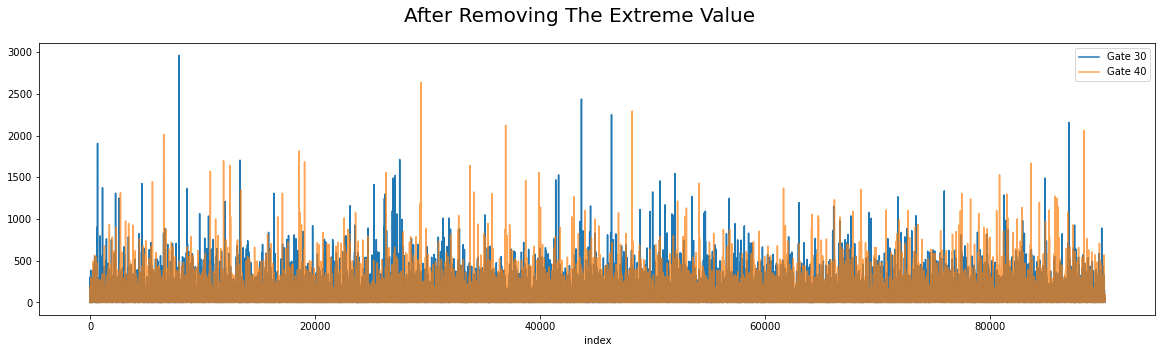

In [13]:
gate30dataset.sum_gamerounds.plot(legend=True, label="Gate 30", figsize = (20, 5))
gate40dataset.sum_gamerounds.plot(legend=True, label="Gate 40", alpha = 0.7)
plt.suptitle("After Removing The Extreme Value", fontsize = 20);

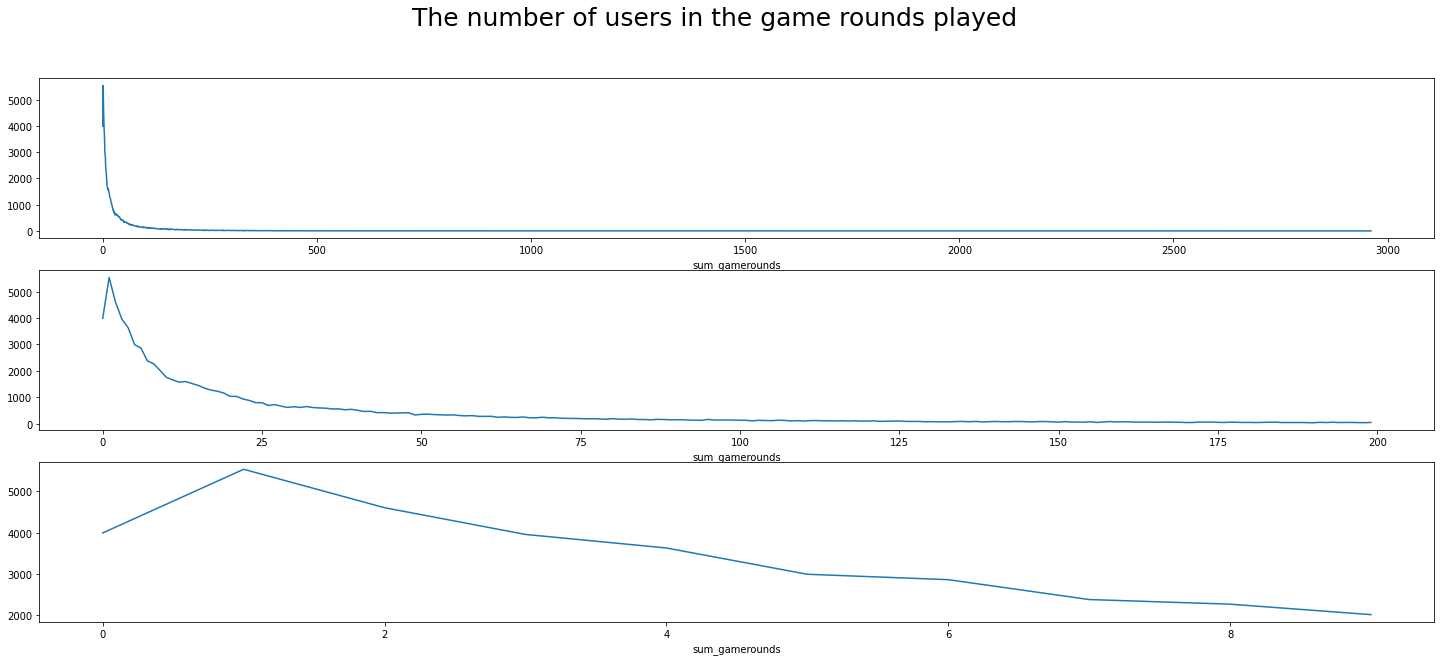

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(25, 10))

dataset.groupby('sum_gamerounds').userid.count().plot(ax=axes[0]);
dataset.groupby('sum_gamerounds').userid.count()[:200].plot(ax=axes[1]);
dataset.groupby('sum_gamerounds').userid.count()[:10].plot(ax=axes[2]);

plt.suptitle("The number of users in the game rounds played", fontsize=25);

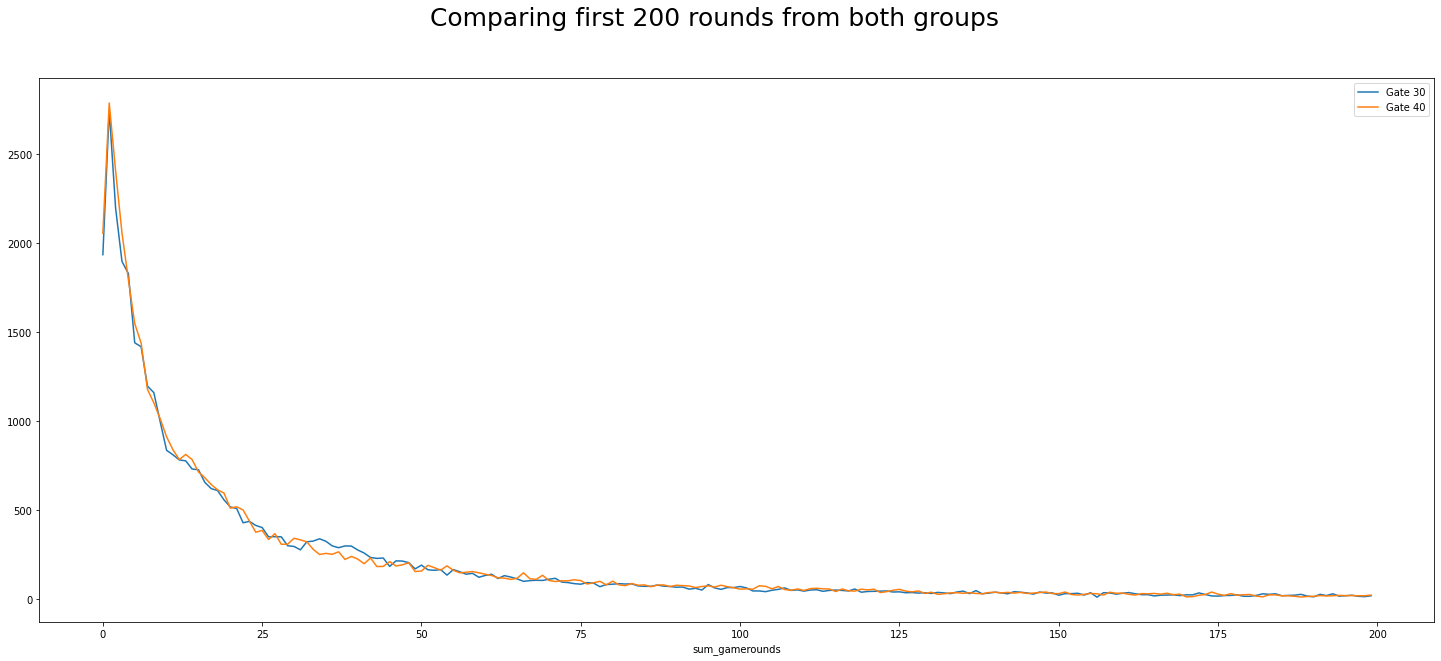

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(25, 10))

gate30dataset.groupby('sum_gamerounds').userid.count()[:200].plot(legend=True, label="Gate 30");
gate40dataset.groupby('sum_gamerounds').userid.count()[:200].plot(legend=True, label="Gate 40");

plt.suptitle("Comparing first 200 rounds from both groups", fontsize=25);

In [16]:
dataset.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17.0000,51.3421,102.0576,2961
gate_40,45489,16.0000,51.2988,103.2944,2640


Both groups look pretty similar. This complies with our null hypotesis: 
- moving the first gate from 30 to 40 level doesn't help with user engagement.

### Retention

In [24]:
import plotly.graph_objects as go

first_day_retension = dataset.retention_1.value_counts()

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=first_day_retension.index, values=first_day_retension.values, pull=[0, 0.2])])

fig.update_layout(
    title_text="User Retention After Day 1",
)

fig.show()

In [25]:
after_week_retension = dataset.retention_7.value_counts()

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=after_week_retension.index, values=after_week_retension.values, pull=[0, 0.2])])

fig.update_layout(
    title_text="User Retention After a Week",
)

fig.show()

In [26]:
dataset.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median    mean      std   max
version retention_1                                      
gate_30 False        24665  6.0000 16.3591  36.5284  1072
        True         20034 48.0000 94.4117 135.0377  2961
gate_40 False        25370  6.0000 16.3404  35.9258  1241
        True         20119 49.0000 95.3812 137.8873  2640

In [ ]:
dataset.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])